# PADEYE DESIGN REPORT

In [1]:
import math
# Shackle detail
# GreenPin P-6036 WLL: 120 MT
D = 95 # mm
B = 147 # mm
H = 329 # mm

# Sling detail 
# OCEANMAX 8 MBF: 581 Tonnes
Ds = 80 # mm

# Material properties
Fy = 345      # MPa, Yield strength
E = 210000    # MPa, Young's modulus
nu = 0.3      # Poisson's ratio

# Padeye geometry
d = 100       # mm, Diameter for shackle hole
t = 40        # mm, Main plate thickness
tc = 30       # mm, Cheek plate thickness
Rpl = 1.75 * d    # mm, Minimum main plate radius
Rp = 200      # mm, Provided main plate radius
Rcl = 1.5 * d     # mm, Minimum cheek plate radius
Rc = 160      # mm, Provided cheek plate radius
tp = 100      # mm, Total thickness of plate
L = 658       # mm, Length of padeye

# Stiffener and load
nstiff = 4        # Number of stiffeners
Hs = 478          # mm, Distance between stiffener center to center
Sl = 86           # MT, Sling load from analysis
g = 9.81          # m/s^2, Acceleration due to gravity
SSL = Sl * g * 1e3   # N, Calculated sling load (converted to kN)

# Permissible stresses
sig_bearing = 0.9 * Fy      # MPa, Permissible bearing stress
sig_shear = 0.4 * Fy        # MPa, Permissible shear stress
# print(sig_bearing)
print(sig_shear)

138.0


## Padeye detail
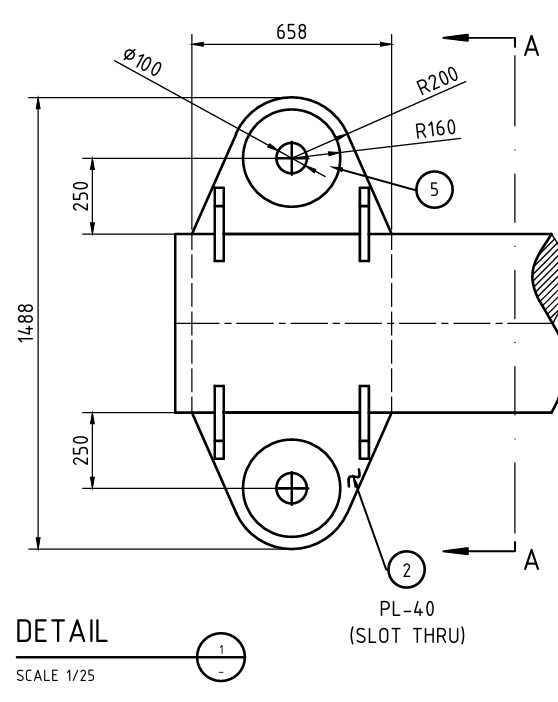

## Check for geometric clearance
**Clearance Between Hole and Pin**

- Pin Diameter: $d = 95 \ mm$
- Diameter of Hole for Main Plate and Cheek Plate: $D = 100 \ mm$
- Clearance between Padeye Hole & Pin:  
    $$
    C_1 = d - D
    $$

---

**Clearance Between Shackle Jaw and Main/Cheek Plate**

- Shackle Jaw Opening Width: $B = 147 mm$
- Clearance between Shackle Jaw & Main + Cheek Plate:  
    $$
    C_2 = \frac{B - t_p}{2}
    $$

---

**Clearance Between Sling and Padeye**

- Sling Clearance:  
    $$
    SC = H - (D_s + R_p - 0.5 \cdot d)
    $$

---

**Minimum and Maximum Hole Sizes**

- Minimum hole:  
    $$
    \text{Minimum\_hole} = \max(D + 3.18\,\text{mm},\ 1.05 \cdot D)
    $$
- Maximum hole:  
    $$
    \text{Maximum\_hole} = D + 9.53\,\text{mm}
    $$

---

**Minimum and Maximum Clearances**

- Minimum clearance:  
    $$
    \text{Minimum\_clearance} = 0.05 \cdot t_p = 4.5\,\text{mm}
    $$
- Maximum clearance:  
    $$
    \text{Maximum\_clearance} = \max(0.1 \cdot t_p,\ 20\,\text{mm}) = 20\,\text{mm}
    $$
---

In [2]:
def padeye_geometric_check(D, d, t, tp, B, H, Ds, Rp):
    """
    Checks geometric clearances and hole sizes for padeye, shackle, and wire rope.

    Parameters:
    D (float): Pin diameter (mm)
    d (float): Diameter of hole for main/cheek plate (mm)
    t (float): Washer thickness (mm)
    tp (float): Total thickness of plate (mm)
    B (float): Shackle jaw opening width (mm)
    H (float): Shackle inside length (mm)
    Ds (float): Sling diameter (mm)
    Rp (float): Provided main plate radius (mm)

    Returns:
    dict: Dictionary with all geometric checks and values.
    """
    # Clearance between padeye hole & pin
    C1 = d - D

    # Clearance between shackle jaw & main+cheek plate
    C2 = (B - tp) / 2

    # Sling clearance
    SC = H - (Ds + Rp - 0.5 * d)

    # Minimum and maximum hole sizes
    minimum_hole = max(D + 3.18, 1.05 * D)
    maximum_hole = D + 9.53

    # Minimum and maximum clearances
    minimum_clearance = 0.05 * tp
    maximum_clearance = max(0.1 * tp, 20)

    # Check if d (hole size) is within min/max hole size
    C1_within_limits = minimum_hole <= d <= maximum_hole
    C1_status = "✅ PASS" if C1_within_limits else "❌ FAIL"
    C1_info = f"Hole size {d:.2f} mm (Allowed: {minimum_hole:.2f} mm - {maximum_hole:.2f} mm) => {C1_status}"

    # Check if C2 (clearance) is within min/max clearance
    C2_within_limits = minimum_clearance <= C2 <= maximum_clearance
    C2_status = "✅ PASS" if C2_within_limits else "❌ FAIL"
    C2_info = f"Clearance {C2:.2f} mm (Allowed: {minimum_clearance:.2f} mm - {maximum_clearance:.2f} mm) => {C2_status}"

    return {
        'clearance_hole_pin': C1,
        'clearance_shackle_jaw_plate': C2,
        'sling_clearance': SC,
        'minimum_hole': minimum_hole,
        'maximum_hole': maximum_hole,
        'minimum_clearance': minimum_clearance,
        'maximum_clearance': maximum_clearance,
        'C1_within_hole_limits': C1_within_limits,
        'C1_info': C1_info,
        'C2_within_clearance_limits': C2_within_limits,
        'C2_info': C2_info
    }

geo_result = padeye_geometric_check(D, d, t, tp, B, H, Ds, Rp)
print("Padeye Geometric Check")
print("-" * 35)
for k, v in geo_result.items():
    if isinstance(v, float) or isinstance(v, int):
        print(f"{k}: {v:.2f} mm")
    else:
        print(f"{k}: {v}")

Padeye Geometric Check
-----------------------------------
clearance_hole_pin: 5.00 mm
clearance_shackle_jaw_plate: 23.50 mm
sling_clearance: 99.00 mm
minimum_hole: 99.75 mm
maximum_hole: 104.53 mm
minimum_clearance: 5.00 mm
maximum_clearance: 20.00 mm
C1_within_hole_limits: 1.00 mm
C1_info: Hole size 100.00 mm (Allowed: 99.75 mm - 104.53 mm) => ✅ PASS
C2_within_clearance_limits: 0.00 mm
C2_info: Clearance 23.50 mm (Allowed: 5.00 mm - 20.00 mm) => ❌ FAIL


## Check for bearing stress at padeye hole
**Bearing stress:** 
$$
\sigma_{b} = \frac{F}{D\cdot t_{p}}
$$

Where:
- $F$ = Load on the padeye (T)
- $D$ = Diameter of the padeye hole (mm)
- $t_{p}$ = Thickness of the main plate (mm)

Padeye bearing stress should not exceed the allowable bearing stress of the material which is:
$$
\sigma_{b} \le 0.9 \cdot F_{y}
$$

In [3]:
def padeye_bearing_check(F, D, t_p, Fy):
    """
    Checks if the bearing stress at the padeye hole is within permissible limits.

    Parameters:
    F (float): Load on the padeye (N)
    D (float): Diameter of the padeye hole (mm)
    t_p (float): Thickness of the main plate (mm)
    Fy (float): Yield strength of the material (MPa)

    Returns:
    dict: Dictionary with calculated bearing stress, permissible bearing stress, and check result.
    """
    # Convert F from N to N (already in N), D and t_p in mm, Fy in MPa
    sigma_b = F / (D * t_p)  # MPa (since 1 N/mm^2 = 1 MPa)
    sigma_bearing_perm = 0.9 * Fy  # MPa
    check = sigma_b <= sigma_bearing_perm

    return {
        'bearing_stress': sigma_b,
        'permissible_bearing_stress': sigma_bearing_perm,
        'is_within_limit': check
    }

bearing_result = padeye_bearing_check(SSL, d, t, Fy)

print("Padeye Bearing Stress Check")
print("-" * 35)
print(f"Applied Load (F): {SSL:,.2f} N")
print(f"Padeye Hole Diameter (D): {d} mm")
print(f"Main Plate Thickness (t_p): {t} mm")
print(f"Yield Strength (Fy): {Fy} MPa\n")
print(f"Calculated Bearing Stress: {bearing_result['bearing_stress']:.2f} MPa")
print(f"Permissible Bearing Stress: {bearing_result['permissible_bearing_stress']:.2f} MPa")
print(f"Within Allowable Limit: {'✅ PASS' if bearing_result['is_within_limit'] else '❌ FAIL'}")

Padeye Bearing Stress Check
-----------------------------------
Applied Load (F): 843,660.00 N
Padeye Hole Diameter (D): 100 mm
Main Plate Thickness (t_p): 40 mm
Yield Strength (Fy): 345 MPa

Calculated Bearing Stress: 210.92 MPa
Permissible Bearing Stress: 310.50 MPa
Within Allowable Limit: ✅ PASS


### Case 1-1 Check shear failure from pin hole through main/cheek plate
**The shear stress should not be greater than the allowable shear stress of the material:**
$$
\sigma_{s} = \frac{F}{A_{p1}} \le 0.4 \cdot F_{y}
$$

Where:
- $F$ = Load on the padeye (T)
- $A_{p1}$ = Resisting area of the plate (mm²)

\
\
**The resisting area of the plate $A_{p1}$ is calculated as:**

$$
A_{p1} = \left( R_p - \frac{d}{2} \right) \cdot 2t + \left( R_c - \frac{d}{2} \right) \cdot 4t_c
$$

Where:  
- $R_p$ = Provided main plate radius  
- $R_c$ = Provided cheek plate radius  
- $d$ = Diameter of shackle hole  
- $t$ = Main plate thickness  
- $t_c$ = Cheek plate thickness

In [4]:
def padeye_shear_check(F, Rp, Rc, d, t, tc, Fy):
    """
    Checks if the shear stress at the pin hole through main/cheek plate is within permissible limits.

    Parameters:
    F (float): Load on the padeye (N)
    Rp (float): Provided main plate radius (mm)
    Rc (float): Provided cheek plate radius (mm)
    d (float): Diameter of shackle hole (mm)
    t (float): Main plate thickness (mm)
    tc (float): Cheek plate thickness (mm)
    Fy (float): Yield strength of the material (MPa)

    Returns:
    dict: Dictionary with calculated shear stress, permissible shear stress, and check result.
    """
    # Calculate resisting area
    Ap1 = (Rp - d/2) * 2 * t + (Rc - d/2) * 4 * tc  # mm^2
    print(Ap1)
    sigma_s = F / Ap1  # MPa (since 1 N/mm^2 = 1 MPa)
    sigma_shear_perm = 0.4 * Fy  # MPa
    check = sigma_s <= sigma_shear_perm

    return {
        'shear_stress': sigma_s,
        'permissible_shear_stress': sigma_shear_perm,
        'is_within_limit': check
    }

shear_result = padeye_shear_check(SSL, Rp, Rc, d, t, tc, Fy)

print("Padeye Shear Stress Check")
print("-" * 35)
print(f"Applied Load (F): {SSL:,.2f} N")
print(f"Main Plate Radius (Rp): {Rp} mm")
print(f"Cheek Plate Radius (Rc): {Rc} mm")
print(f"Shackle Hole Diameter (d): {d} mm")
print(f"Main Plate Thickness (t): {t} mm")
print(f"Cheek Plate Thickness (tc): {tc} mm")
print(f"Yield Strength (Fy): {Fy} MPa\n")
print(f"Calculated Shear Stress: {shear_result['shear_stress']:.2f} MPa")
print(f"Permissible Shear Stress: {shear_result['permissible_shear_stress']:.2f} MPa")
print(f"Within Allowable Limit: {'✅ PASS' if shear_result['is_within_limit'] else '❌ FAIL'}")

25200.0
Padeye Shear Stress Check
-----------------------------------
Applied Load (F): 843,660.00 N
Main Plate Radius (Rp): 200 mm
Cheek Plate Radius (Rc): 160 mm
Shackle Hole Diameter (d): 100 mm
Main Plate Thickness (t): 40 mm
Cheek Plate Thickness (tc): 30 mm
Yield Strength (Fy): 345 MPa

Calculated Shear Stress: 33.48 MPa
Permissible Shear Stress: 138.00 MPa
Within Allowable Limit: ✅ PASS


### Case 2 section 2-2 check for shear stress failure in main plate

**The allowable shear stress is:**
$$
0.4 \cdot F_{y} =138 \ MPa
$$

**The resisting area of the plate is calculated as:**
$$
A_{p2} = (R_p - R_c) \cdot 2t + \pi R_c t
$$

Where:  
- $R_p$ = Provided main plate radius  
- $R_c$ = Provided cheek plate radius  
- $t$ = Main plate thickness

**Shear Stress**

The shear stress is:
$$
\tau_{v2} = \frac{F}{A_{p2}}
$$

Where:  
- $F$ = Load on the padeye (N)  
- $A_{p2}$ = Resisting area of the plate (mm²)


In [5]:
# Calculate resisting area of plate (A_p2)
Ap2 = (Rp - Rc) * 2 * t + math.pi * Rc * t  # mm^2

# Calculate shear stress (tau_v2)
tau_v2 = SSL / Ap2  # MPa

# Allowable shear stress
tau_allow = 0.4 * Fy  # MPa

# Check
Pad_shear2 = "OK" if tau_v2 < tau_allow else "REDESIGN"

print(f"Resisting Area of Plate (A_p2): {Ap2:.2f} mm²")
print(f"Shear Stress (τ_v2): {tau_v2:.2f} MPa")
print(f"Allowable Shear Stress: {tau_allow:.2f} MPa")
print(f"Shear Check Result: {Pad_shear2}")

Resisting Area of Plate (A_p2): 23306.19 mm²
Shear Stress (τ_v2): 36.20 MPa
Allowable Shear Stress: 138.00 MPa
Shear Check Result: OK
